<h1>Visualize ExeBuiltByOMEdit: AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00</h1>
<h2>notebook: rev001</h2>
<p>compatability with OpenModelica v1.21.0</p>
<h2>memo: </h2>
<p></p>

<h1>Load modules </h1>

In [8]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

import os
from os.path import expanduser

import numpy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib
import math

from IPython.display import display, HTML

backslash= '\\'
print('------------------------------')

------------------------------


In [9]:
#****************************************
#    User must NOT edit code below 
#****************************************
# ----- prepare for post process -----
n_df=1000
df=[[]]*n_df
i_df= -1
print('----------')

----------


<h1>===========================================================================</h1>

<h1>Run simulation model #1</h1>

<h1>User settings: Library and Model information</h1>
<p>Edit the strings below </p>

In [10]:
dirWorkRelToHome='/OMPythonWork'
swWorkSubDir= 'fullpathModel'
'''
'None': 
'fullPathModel': work in sub dir named with fullaPathModel
'''

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
libs2load=["PropulsionSystem", "FluidSystemComponents", "WalkingInWorldOfThermoFluid", "AircraftDynamics", "SystemModels", "InteractiveSimulation"]
fullpathModel='AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00'
nmModel='TwoBodyOrbital00'
stopTime=2000.0
outputFormat='csv'

#****************************************
#    User must NOT edit code below 
#****************************************
dirWorkRelToHome= dirWorkRelToHome.replace(backslash, '/')
if(swWorkSubDir=='fullpathModel'):
    dirWorkRelToHome= dirWorkRelToHome + '/' + fullpathModel
##### end if #####

print('------------------------------')

------------------------------


<h1>Setup </h1>

In [11]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()
pathNotebook= pathNotebook.replace(backslash, '/')
print('------------------------------'); print('')

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirHome= dirHome.replace(backslash, '/')
dirWorkRelToHome= dirWorkRelToHome.replace(backslash, '/')
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
dirLib=''
sys.path.append('..')
dirLib= pathlib.Path('../../')
dirLib_upper1= pathlib.Path('../../')

dirLib= dirLib.resolve()
dirLib= str(dirLib)
dirLib= dirLib.replace('\\', '/')

dirLib_upper1= dirLib_upper1.resolve()

fullpathModelFile= str(dirLib_upper1)+'\\'+fullpathModel.replace('.','\\') +'.mo'
fullpathModelFile= fullpathModelFile.replace('\\', '/')


print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library which contains this notebook is: ' + str(dirLib))
print("-. Full path of Model to be ran is: " + fullpathModel)
print("-. Full path of Model file to be ran is: " + fullpathModelFile)

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

------------------------------

########## check user settings and related info. ##########
-. This OS is: Windows (nt)
-. Home directory of current environment is: C:/Users/berku
-. Temporary Working directory is: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00

-. Directory of This notebook: D:/Dropbox/01-sharedspace/modelica-shared/CustomLib/ipynbs4OMPython/AircraftDynamics
-. Directory of library which contains this notebook is: D:/Dropbox/01-sharedspace/modelica-shared/CustomLib
-. Full path of Model to be ran is: AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00
-. Full path of Model file to be ran is: D:/Dropbox/01-sharedspace/modelica-shared/CustomLib/AircraftDynamics/PtMassFDM/DoF3/Examples/TwoBodyOrbital00.mo

------------------------------
move to directory of notebook
currend dir, back to: D:\Dropbox\01-sharedspace\modelica-shared\CustomLib\ipynbs4OMPython\AircraftDynamics
------------------------------


<h1>Setup </h1>

In [12]:
#**************************************************
# ----- setup -----
#**************************************************
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#-- move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#--------------------
#    set build option for old frontend
#    this option setting is neccesarry so that model written with older than Modelica 4.0.0 is ran by OpenModelica newer than 1.17.0
#--------------------
print(''); print('...front end setting, wait...')
strcmd='disableNewInstantiation()'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#----------------------------------------
#    settings of command line options
#----------------------------------------
print(''); print('...front end setting, wait...')
strcmd='setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization, evaluateAllParameters,NLSanalyticJacobian")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# --- get error message from OMShell ---
print('')
errMsg= omc.sendExpression('getErrorString()')
print('OMShell error message: ')
print(str(errMsg))
print('')

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: C:\Users\berku\OMPythonWork\AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00
------------------------------

send: cd("C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00")
OMShell: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00

...front end setting, wait...
send: disableNewInstantiation()
OMShell: True

OMShell error message: 



...front end setting, wait...
send: setCommandLineOptions("--matchingAlgorithm=PFPlusExt --indexReductionMethod=dummyDerivatives -d=initialization, evaluateAllParameters,NLSanalyticJacobian")
OMShell: False

OMShell error message: 



------------------------------
move to directory of notebook
currend dir, back to: D:\Dropbox\01-sharedspace\modelica-shared\CustomLib\ipynbs4OMPython\AircraftDynamics
------------------------------


<h1>---------------------------------------------------------------------------------------------------------</h1>

<h1>Post Process --- Read csv data into table object ---</h1>

<h2>Read csv, case of default parameter setting</h2>

In [17]:
i_df=0

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

#nmcsv= fullpathModel + '_res.csv'
nmcsv= nmModel + '_res.csv'
fullpathFile= os.getcwd()+"/"+nmcsv
fullpathFile= fullpathFile.replace(backslash, "/")
print("data read: "+ fullpathFile)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: C:\Users\berku\OMPythonWork\AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00
------------------------------

data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res.csv

------------------------------
move to directory of notebook
currend dir, back to: D:\Dropbox\01-sharedspace\modelica-shared\CustomLib\ipynbs4OMPython\AircraftDynamics


,time,r2[1],r2[2],r2[3],v2[1],v2[2],v2[3],der(r2[1]),der(r2[2]),der(r2[3]),der(v2[1]),der(v2[2]),der(v2[3]),Alt,a2[1],a2[2],a2[3],mag_r2,mu,vAbs
0,0,6.778137e+06,0.000000e+00,0,0.000000,10000.000000,0,0.000000,10000.000000,0,-8.675706,-0.000000,0,4.000000e+05,-8.675706,-0.000000,0,6.778137e+06,398589196000000,10000.000000
1,5,6.778024e+06,4.999969e+04,0,-43.377811,9999.832867,0,-43.377811,9999.832867,0,-8.675288,-0.063995,0,4.000711e+05,-8.675288,-0.063995,0,6.778208e+06,398589196000000,9999.926950
2,10,6.777699e+06,9.999779e+04,0,-86.751377,9999.353435,0,-86.751377,9999.353435,0,-8.673996,-0.127976,0,4.002994e+05,-8.673996,-0.127976,0,6.778436e+06,398589196000000,9999.729743
3,15,6.777157e+06,1.499927e+05,0,-130.116342,9998.553971,0,-130.116342,9998.553971,0,-8.671844,-0.191926,0,4.006794e+05,-8.671844,-0.191926,0,6.778816e+06,398589196000000,9999.400571
4,20,6.776398e+06,1.999828e+05,0,-173.468396,9997.434683,0,-173.468396,9997.434683,0,-8.668832,-0.255832,0,4.012111e+05,-8.668832,-0.255832,0,6.779348e+06,398589196000000,9998.939520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,6985,-2.416462e+07,1.502441e+07,0,-3104.987478,-874.447127,0,-3104.987478,-874.447127,0,0.418071,-0.259937,0,2.207642e+07,0.418071,-0.259937,0,2.845456e+07,398589196000000,3225.772003
1398,6990,-2.418014e+07,1.502003e+07,0,-3102.897649,-875.745875,0,-3102.897649,-875.745875,0,0.417860,-0.259563,0,2.208729e+07,0.417860,-0.259563,0,2.846543e+07,398589196000000,3224.113004
1399,6995,-2.419565e+07,1.501565e+07,0,-3100.808873,-877.042758,0,-3100.808873,-877.042758,0,0.417650,-0.259191,0,2.209816e+07,0.417650,-0.259191,0,2.847629e+07,398589196000000,3222.455534
1400,7000,-2.421115e+07,1.501126e+07,0,-3098.721148,-878.337780,0,-3098.721148,-878.337780,0,0.417440,-0.258819,0,2.210902e+07,0.417440,-0.258819,0,2.848715e+07,398589196000000,3220.799591


<h1> list of columns on csv </h1>

In [18]:
i_df=0

print('list of variables on csv')
df[i_df].columns.tolist()


list of variables on csv


['time',
 'r2[1]',
 'r2[2]',
 'r2[3]',
 'v2[1]',
 'v2[2]',
 'v2[3]',
 'der(r2[1])',
 'der(r2[2])',
 'der(r2[3])',
 'der(v2[1])',
 'der(v2[2])',
 'der(v2[3])',
 'Alt',
 'a2[1]',
 'a2[2]',
 'a2[3]',
 'mag_r2',
 'mu',
 'vAbs']

<h1>Read csv, array, specify start and end</h1>

In [19]:
i_df_begin=2
i_df_end=6

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

for i in range(i_df_begin, i_df_end+1):
    i_df=i
    print('i_df='+str(i_df))
    nmcsv= nmModel + '_res_'+str(i_df)+'.csv'
    fullpathFile= os.getcwd()+"/"+nmcsv
    fullpathFile= fullpathFile.replace(backslash, "/")
    print("data read: "+ fullpathFile)
    df.insert(i_df, pd.read_csv(nmcsv))
##### end for #####

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())


currend dir: C:\Users\berku\OMPythonWork\AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00
------------------------------

i_df=2
data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_2.csv
i_df=3
data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_3.csv
i_df=4
data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_4.csv
i_df=5
data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_5.csv
i_df=6
data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_6.csv

------------------------------
move to directory of notebook
currend dir, back to: D:\Dropbox\01-sharedspace\modelica-shared\CustomLib\ipynbs4OMPython\AircraftDynamics


<h1>Read csv, selected case#</h1>

In [21]:
i_df=1

#***** move to temporary working directory *****
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())
print('------------------------------'); print('')

nmcsv= nmModel + '_res_' + str(i_df) + '.csv'
fullpathFile= os.getcwd()+"/"+nmcsv
fullpathFile= fullpathFile.replace(backslash, "/")
print("data read: "+ fullpathFile)
df.insert(i_df, pd.read_csv(nmcsv))

#***** move back to notebook directory *****
print(''); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: C:\Users\berku\OMPythonWork\AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00
------------------------------

data read: C:/Users/berku/OMPythonWork/AircraftDynamics.PtMassFDM.DoF3.Examples.TwoBodyOrbital00/TwoBodyOrbital00_res_1.csv

------------------------------
move to directory of notebook
currend dir, back to: D:\Dropbox\01-sharedspace\modelica-shared\CustomLib\ipynbs4OMPython\AircraftDynamics


,time,r2[1],r2[2],r2[3],v2[1],v2[2],v2[3],der(r2[1]),der(r2[2]),der(r2[3]),der(v2[1]),der(v2[2]),der(v2[3]),Alt,a2[1],a2[2],a2[3],mag_r2,mu,vAbs
0,0,6.778137e+06,0.000000e+00,0,0.000000,10000.000000,0,0.000000,10000.000000,0,-8.675706,-0.000000,0,4.000000e+05,-8.675706,-0.000000,0,6.778137e+06,398589196000000,10000.000000
1,1,6.778131e+06,9.999995e+03,0,-8.675698,9999.991256,0,-8.675698,9999.991256,0,-8.675693,-0.012800,0,4.000015e+05,-8.675693,-0.012800,0,6.778138e+06,398589196000000,9999.995020
2,2,6.778116e+06,1.999997e+04,0,-17.351357,9999.968568,0,-17.351357,9999.968568,0,-8.675647,-0.025599,0,4.000082e+05,-8.675647,-0.025599,0,6.778145e+06,398589196000000,9999.983621
3,3,6.778093e+06,2.999992e+04,0,-26.026951,9999.935259,0,-26.026951,9999.935259,0,-8.675564,-0.038398,0,4.000225e+05,-8.675564,-0.038398,0,6.778160e+06,398589196000000,9999.969129
4,4,6.778063e+06,3.999983e+04,0,-34.702448,9999.890314,0,-34.702448,9999.890314,0,-8.675443,-0.051197,0,4.000437e+05,-8.675443,-0.051197,0,6.778181e+06,398589196000000,9999.950527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,6997,-2.420185e+07,1.501390e+07,0,-3099.973657,-877.560990,0,-3099.973657,-877.560990,0,0.417566,-0.259042,0,2.210250e+07,0.417566,-0.259042,0,2.848064e+07,398589196000000,3221.792974
6998,6998,-2.420495e+07,1.501302e+07,0,-3099.556112,-877.819994,0,-3099.556112,-877.819994,0,0.417524,-0.258967,0,2.210467e+07,0.417524,-0.258967,0,2.848281e+07,398589196000000,3221.461785
6999,6999,-2.420805e+07,1.501214e+07,0,-3099.138609,-878.078924,0,-3099.138609,-878.078924,0,0.417482,-0.258893,0,2.210684e+07,0.417482,-0.258893,0,2.848498e+07,398589196000000,3221.130658
7000,7000,-2.421115e+07,1.501126e+07,0,-3098.721148,-878.337780,0,-3098.721148,-878.337780,0,0.417440,-0.258819,0,2.210902e+07,0.417440,-0.258819,0,2.848715e+07,398589196000000,3220.799591


<h1>===========================================================================</h1>

<h1>Post Process --- Visualization ---</h1>

In [22]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Simulation results; Inputs</h2>

In [ ]:
''' fig.append(plt.figure(figsize=(15,8)))

i_df=0
varName="uSignal_thrustLevel1.y[1]"
time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
plt.plot(time, var, color='blue')

#----------
plt.xlabel('time [s]')
plt.ylabel('fraction against weight [nond]')
plt.title('thrust of rotor 1')

#plt.legend(loc='upper right', fontsize=12)
plt.ylim(0.2, 0.4)
plt.grid()
print('------------------------------') '''

<h2>Simulation Results; Outputs</h2>

------------------------------


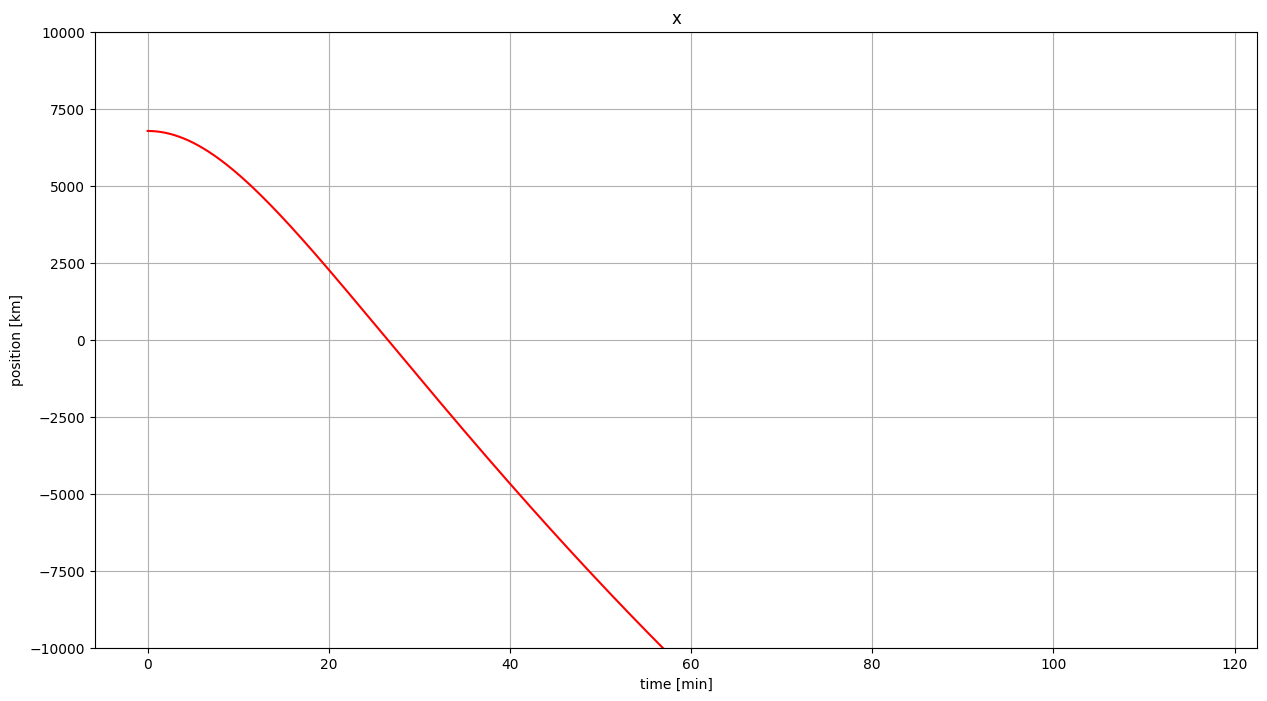

In [26]:
fig.append(plt.figure(figsize=(15,8)))

i_df=1

varName="r2[1]"
label="x"
time= df[i_df].loc[:,'time']*1.0/60.0
var= df[i_df].loc[:,varName]*1.0/1000.0
plt.plot(time, var, color="red")

#----------
plt.xlabel('time [min]')
plt.ylabel('position [km]')
plt.title('x')

#plt.legend(loc='upper right', fontsize=12)
#plt.xlim(40,100)
plt.ylim(-10000, 10000)
plt.grid()
print('------------------------------')

------------------------------


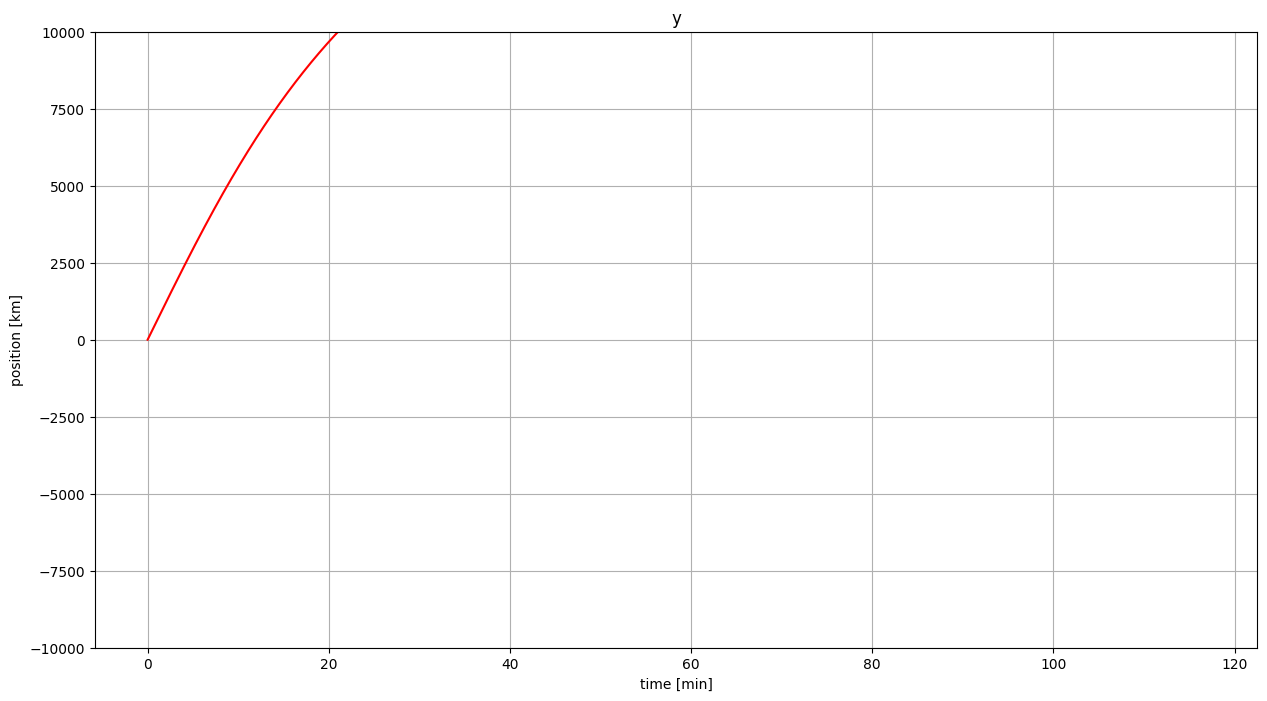

In [27]:
fig.append(plt.figure( figsize=(15,8)))

i_df=1

varName="r2[2]"
label="y"
time= df[i_df].loc[:,'time']*1.0/60.0
var= df[i_df].loc[:,varName]*1.0/1000.0
plt.plot(time, var, color="red")

#----------
plt.xlabel('time [min]')
plt.ylabel('position [km]')
plt.title('y')

#plt.legend(loc='upper right', fontsize=12)
#plt.xlim(40,100)
plt.ylim(-10000, 10000)
plt.grid()
print('------------------------------')

------------------------------


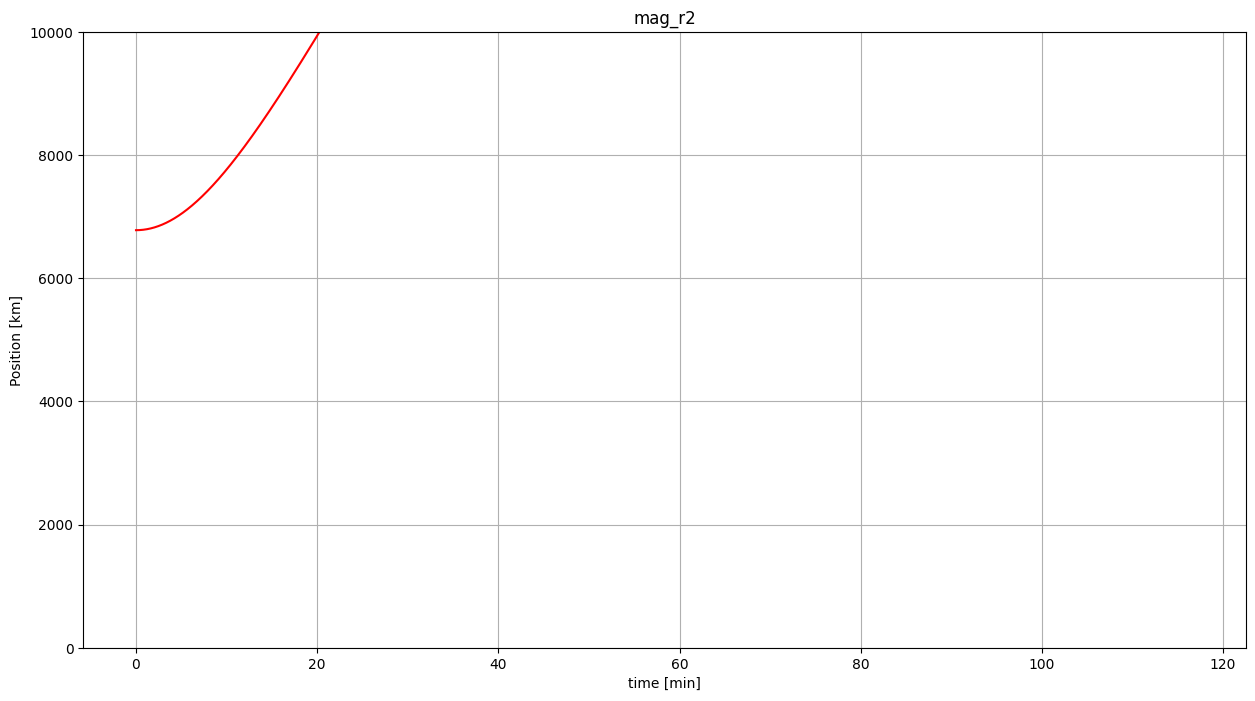

In [28]:
fig.append(plt.figure( figsize=(15,8)))

i_df=1

varName="mag_r2"
label="y"
time= df[i_df].loc[:,'time']*1.0/60.0
var= df[i_df].loc[:,varName]*1.0/1000.0
plt.plot(time, var, color="red")

#----------
plt.xlabel('time [min]')
plt.ylabel('Position [km]')
plt.title('mag_r2')

#plt.legend(loc='upper right', fontsize=12)
#plt.xlim(40,100)
plt.ylim(0, 10000)
plt.grid()
print('------------------------------')

------------------------------


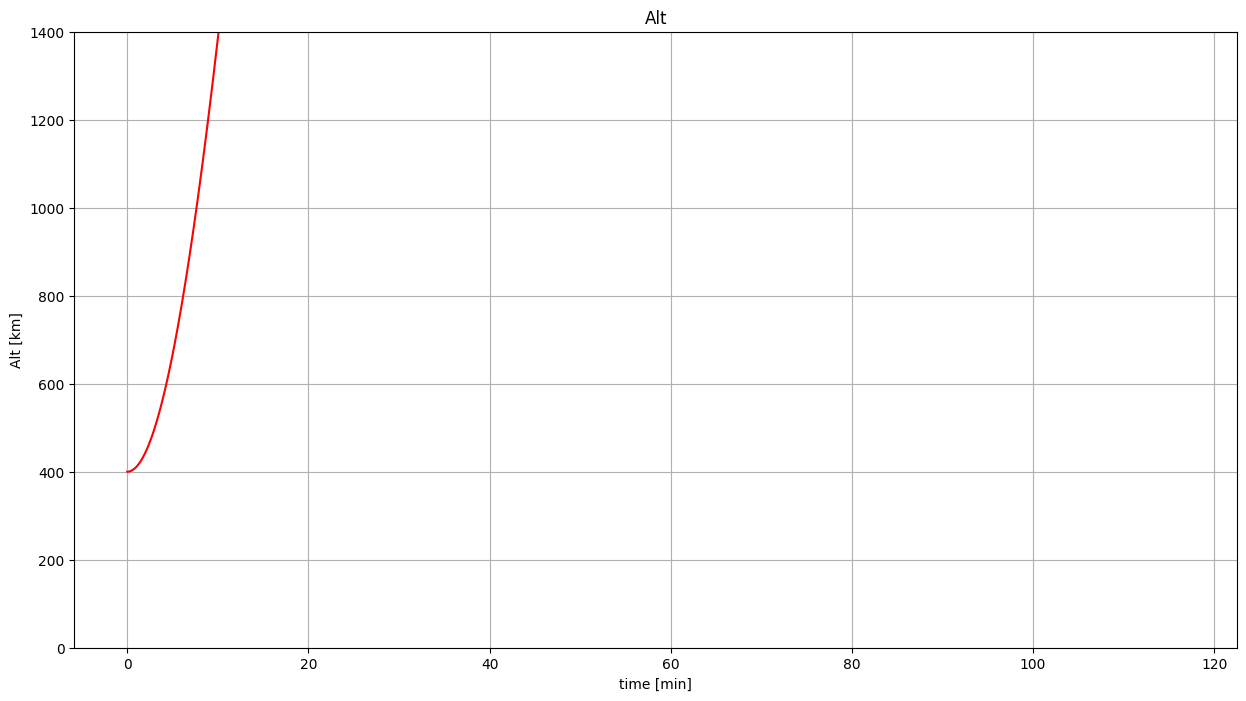

In [29]:
fig.append(plt.figure( figsize=(15,8)))

i_df=1

varName="Alt"
label="y"
time= df[i_df].loc[:,'time']*1.0/60.0
var= df[i_df].loc[:,varName]*1.0/1000.0
plt.plot(time, var, color="red")

#----------
plt.xlabel('time [min]')
plt.ylabel('Alt [km]')
plt.title('Alt')

#plt.legend(loc='upper right', fontsize=12)
#plt.xlim(40,100)
plt.ylim(0, 1400)
plt.grid()
print('------------------------------')

------------------------------


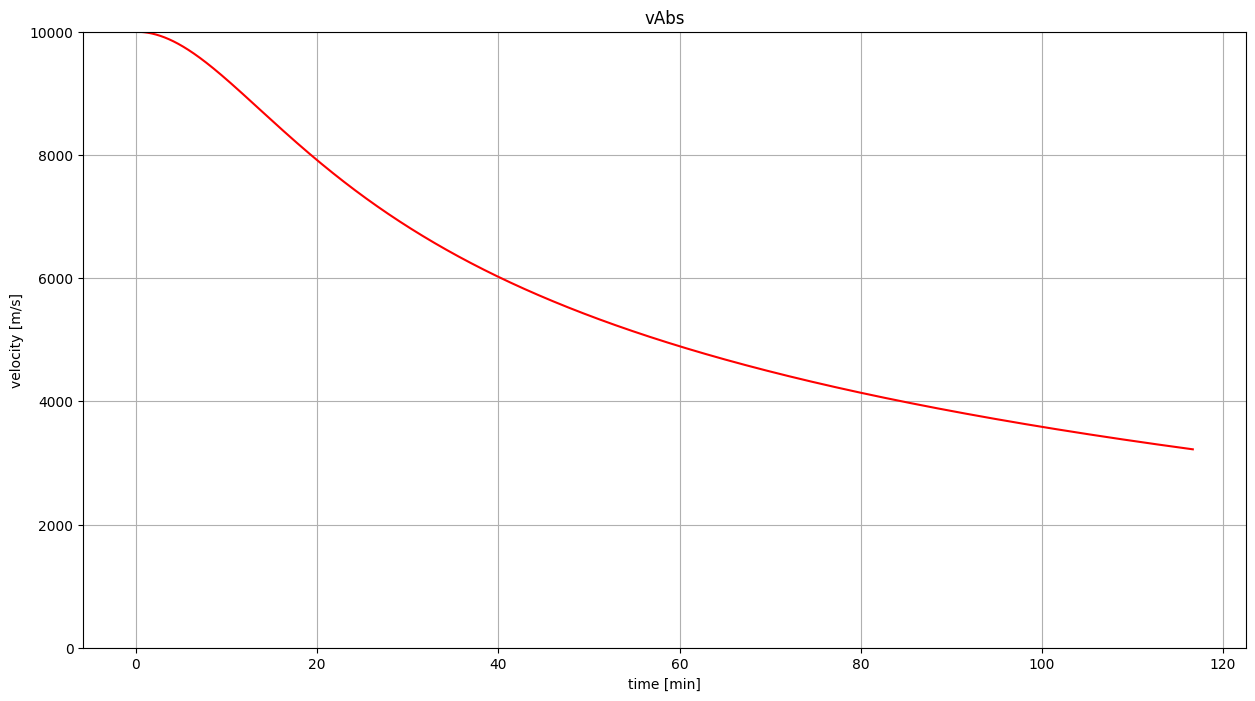

In [30]:
fig.append(plt.figure( figsize=(15,8)))

i_df=1

varName="vAbs"
label="y"
time= df[i_df].loc[:,'time']*1.0/60.0
var= df[i_df].loc[:,varName]
plt.plot(time, var, color="red")

#----------
plt.xlabel('time [min]')
plt.ylabel('velocity [m/s]')
plt.title('vAbs')

#plt.legend(loc='upper right', fontsize=12)
#plt.xlim(40,100)
plt.ylim(0, 10000)
plt.grid()
print('------------------------------')

------------------------------


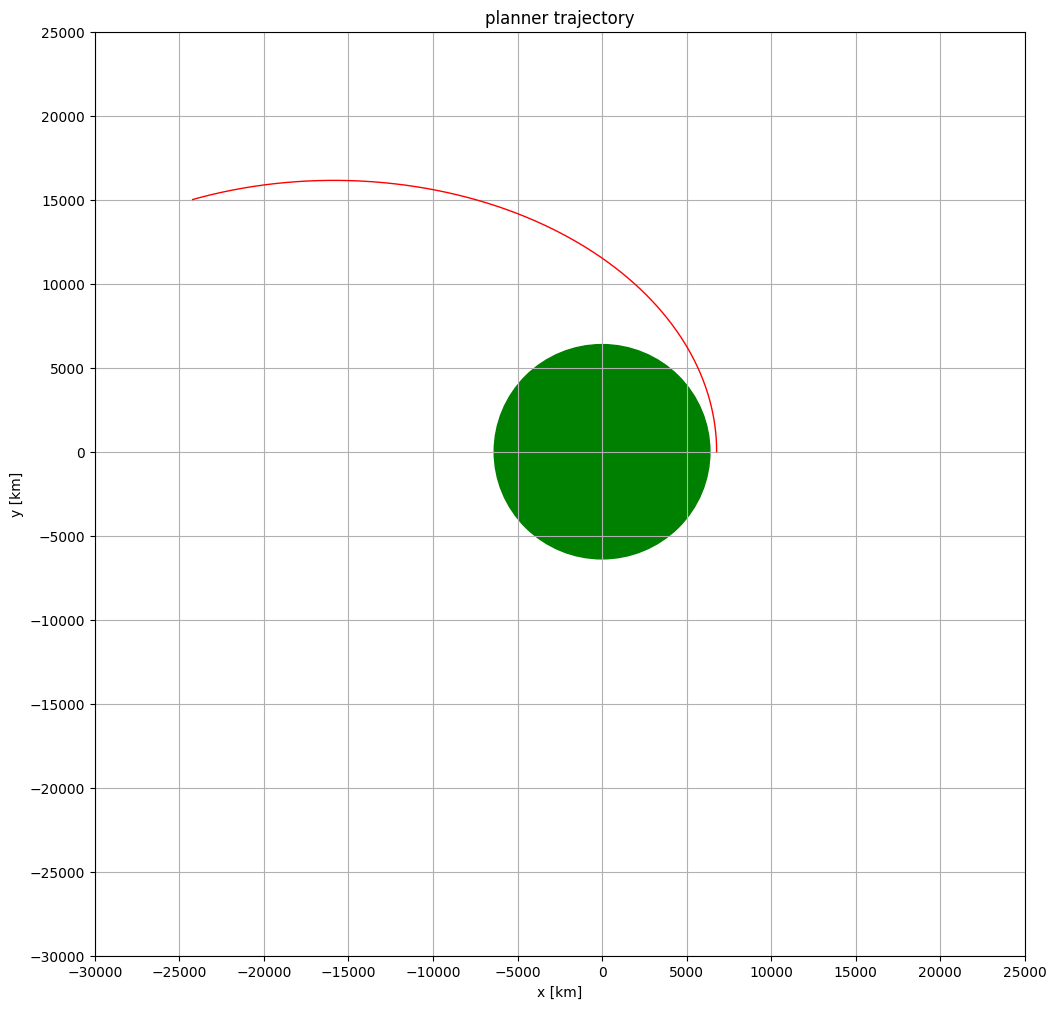

In [35]:
i_df=1
fig.append(plt.figure(figsize=[12, 12]))
ax = plt.axes()

title="planner trajectory"
xVarName="r2[1]"
yVarName="r2[2]"
xlabel='x [km]'
ylabel='y [km]'


xVar= df[i_df].loc[:, xVarName]*1.0/1000.0
yVar= df[i_df].loc[:, yVarName]*1.0/1000.0

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.plot(xVar, yVar, color='red', linewidth=1.0)
plt.grid()

# --- drow planet
planet = mpl.patches.Circle(xy=(0, 0), radius=6378.137, fc='green', ec='green')
ax.add_patch(planet)

plt.xticks(numpy.arange(-30000, 30000, 5000))
plt.yticks(numpy.arange(-30000, 30000, 5000))

print('------------------------------')

In [ ]:
i_df=0
fig.append(plt.figure(figsize = (18, 18)))
ax = fig[-1].gca(projection='3d')

# ***** Make data for sphere *****
u = numpy.linspace(0, 2 * numpy.pi, 10)
v = numpy.linspace(0, numpy.pi, 10)
radius= 6378.137
xShpere = radius * numpy.outer(numpy.cos(u), numpy.sin(v))
yShpere = radius * numpy.outer(numpy.sin(u), numpy.sin(v))
zShpere = radius * numpy.outer(numpy.ones(numpy.size(u)), numpy.cos(v))

ax.plot_surface(xShpere, yShpere, zShpere, zorder=-1, color='green')

# ***** plot trajectry *****
title="flight trajectory"
xVarName="r2[1]"
yVarName="r2[2]"
zVarName="r2[3]"
xlabel='x [km]'
ylabel='y [km]'
zlabel="z [km]"

xVar= df[i_df].loc[:, xVarName]*1.0/1000.0
yVar= df[i_df].loc[:, yVarName]*1.0/1000.0
zVar= df[i_df].loc[:, zVarName]*1.0/1000.0

ax.set_title(title, size=20)
ax.set_xlabel(xlabel, size=12)
ax.set_ylabel(ylabel, size=12)
ax.set_zlabel(zlabel, size=12)

ax.plot(xVar, yVar, zVar, zorder=2, color='red', linewidth=1.0)

plt.grid()
ax.set_xlim(0, 240)
ax.set_ylim(0, 240)
ax.set_zlim(0, 100+10)
ax.set_xticks( numpy.arange(-10000, 12000, 2000) )
ax.set_yticks( numpy.arange(-10000, 12000, 2000) )
ax.set_zticks( numpy.arange(-10000, 12000, 2000) )

ax.view_init( elev=10, azim=-10 )

print('------------------------------')

<h1>Extract variables at specified time</h1>

<p>-</p>

In [ ]:
'''
i_df=1
tgtTime=45
widthTime=1

#******************************
#*** find the row of target time ***
rowTgt=0
for i in range(len(df[i_df])):
    if((tgtTime-widthTime <= df[i_df].at[i,'time']) and (df[i_df].at[i,'time'] <= tgtTime) ):
        rowTgt=i
        timeExtrd=df[i_df].at[i,'time']
    ##### end if #####
##### end for #####

print("row extracted = "+str(rowTgt))
print("time of extracted = "+str(timeExtrd))

arr_h=[]
arr_s=[]
arr_v=[]
arr_T=[]
arr_u=[]
for i in range(1,5+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_h['+str(i)+']')]
    arr_h.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_s['+str(i)+']')]
    arr_s.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_v['+str(i)+']')]
    arr_v.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_T['+str(i)+']')]
    arr_T.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.arr_u['+str(i)+']')]
    arr_u.append(val)
##### end for #####

arr_V=[]
arr_p=[]
for i in range(1,8+1):
    # ***** extract specified variables of target row *****
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_p['+str(i)+']')]
    arr_p.append(val)
    val= df[i_df].at[rowTgt, ('PistonCylinder.arr_V['+str(i)+']')]
    arr_V.append(val)
##### end for #####

nPts= df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs[1].nPts')]
s_curve_hs=[[]]*4; h_curve_hs=[[]]*4
v_curve_pv=[[]]*4; p_curve_pv=[[]]*4
s_curve_Ts=[[]]*4; T_curve_Ts=[[]]*4
s_curve_us=[[]]*4; u_curve_us=[[]]*4
V_curve_pVol=[[]]*4; p_curve_pVol=[[]]*4

arrTemp_s_hs=[]; arrTemp_h_hs=[]
arrTemp_s_Ts=[]; arrTemp_T_Ts=[]
arrTemp_s_us=[]; arrTemp_u_us=[]
arrTemp_v_pv=[]; arrTemp_p_pv=[]
arrTemp_V_pVol=[]; arrTemp_p_pVol=[]

for j in range(1, 4+1):
    for i in range(1, nPts+1):
        # ***** extract specified variables of target row *****
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_hs['+str(j)+'].arr_h['+str(i)+']')]; arrTemp_h_hs.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_Ts['+str(j)+'].arr_T['+str(i)+']')]; arrTemp_T_Ts.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_us['+str(j)+'].arr_u['+str(i)+']')]; arrTemp_u_us.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_v['+str(i)+']')]; arrTemp_v_pv.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pv['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pv.append(val)
        
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_V['+str(i)+']')]; arrTemp_V_pVol.append(val)
        val=df[i_df].at[rowTgt, ('PistonCylinder.OttoCycle.curve_pVol['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pVol.append(val)
    ##### end for #####
    
    s_curve_hs[j-1]=arrTemp_s_hs; arrTemp_s_hs=[]
    h_curve_hs[j-1]=arrTemp_h_hs; arrTemp_h_hs=[]
    s_curve_Ts[j-1]=arrTemp_s_Ts; arrTemp_s_Ts=[]
    T_curve_Ts[j-1]=arrTemp_T_Ts; arrTemp_T_Ts=[]
    s_curve_us[j-1]=arrTemp_s_us; arrTemp_s_us=[]
    u_curve_us[j-1]=arrTemp_u_us; arrTemp_u_us=[]
    v_curve_pv[j-1]=arrTemp_v_pv; arrTemp_v_pv=[]
    p_curve_pv[j-1]=arrTemp_p_pv; arrTemp_p_pv=[]
    
    V_curve_pVol[j-1]=arrTemp_V_pVol; arrTemp_V_pVol=[]
    p_curve_pVol[j-1]=arrTemp_p_pVol; arrTemp_p_pVol=[]
##### end for #####
'''
print('------------------------------')

In [ ]:
'''
fig.append(plt.figure(figsize=(20,20)))
for i in range(4):
    if((i==1-1)or(i==3-1)):
        plt.plot(V_curve_pVol[i], p_curve_pVol[i], linestyle='dashed')
##### end for #####

plt.grid()
plt.title('p vs. V'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('volume [m3]')
plt.ylabel('pressure [Pa]')
for i in range(0, 8-1):
    if((i==1)or(i==3)or(i==4)or(i==6)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
    
    if((i==5)or(i==7)):
        root=[arr_V[i+1],arr_p[i+1]]
        head=[arr_V[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.25, headwidth=6, headlength=6, connectionstyle='arc3',
                                    facecolor='black', edgecolor='black', linestyle='dashed')
                    )
    ##### end if #####
##### end for #####

plt.scatter(x=arr_V, y=arr_p, color='red', s=20)

'''
print('------------------------------')

<p>----------------------------------------------------------------------</p>

<h1>Process at the end of note</h1>

In [ ]:
print(""); print('------------------------------')
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')